# **Laboratorio 8: Ready, Set, Deploy! 👩‍🚀👨‍🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Josefa Anselmo.
- Nombre de alumno 2: Tamara Carrasco.

### **Link de repositorio de GitHub:** [TamoJosha](https://github.com/Tamaracarrasco/TamoJosha-Lab-de-Prog-MDS-Prim2025)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

In [3]:
# Importación de librerías importantes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# carga de los datos
df = pd.read_csv("water_potability.csv", sep=",")

# EDA inicial
print("Dimensiones del dataset: ", df.shape)
print("Columnas del dataset: \n", df.columns.tolist())

# valores nulos

print("Valores nulos: \n", df.isna().sum())

# Valores duplicados

print("Valores duplicados: \n", df.duplicated().sum())

# columnas

df_num_cols = df.select_dtypes(include="number").columns.tolist()
df_cat_cols = df.select_dtypes(include=["object", "category", "string"]).columns.tolist()

print("Columnas numéricas: \n", df_num_cols)
print("Columnas categóricas: \n", df_cat_cols)


df.head(3)

Dimensiones del dataset:  (3276, 10)
Columnas del dataset: 
 ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
Valores nulos: 
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Valores duplicados: 
 0
Columnas numéricas: 
 ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
Columnas categóricas: 
 []


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


**Comentario:** 
- Todas las columnas son numéricas.
- No hay valores duplicados.
- Hay valores faltantes en las columnas : ``ph``, ``Sulfate``, y ``Trihalomethanes``. Se realizan gráficos para ver la distribución de las variables y así determinar las imputaciones.


==================== Describe de la variable ph ====================
count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64


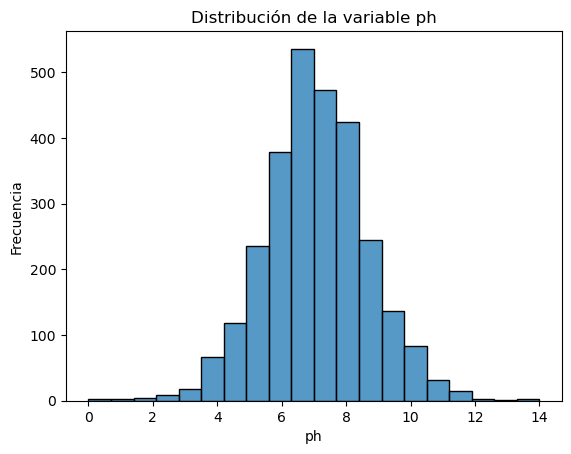

==================== Describe de la variable Hardness ====================
count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64


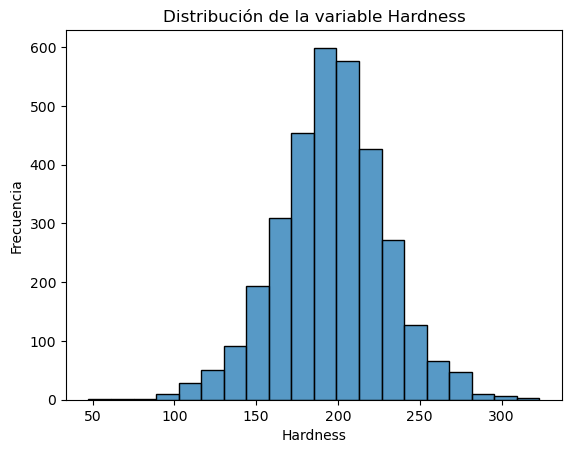

==================== Describe de la variable Solids ====================
count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64


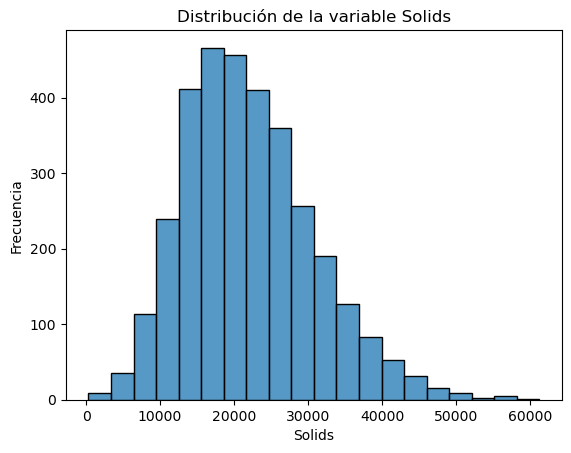

==================== Describe de la variable Chloramines ====================
count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64


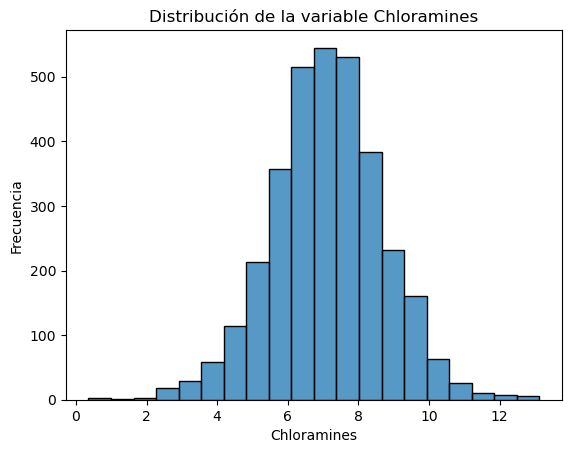

==================== Describe de la variable Sulfate ====================
count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64


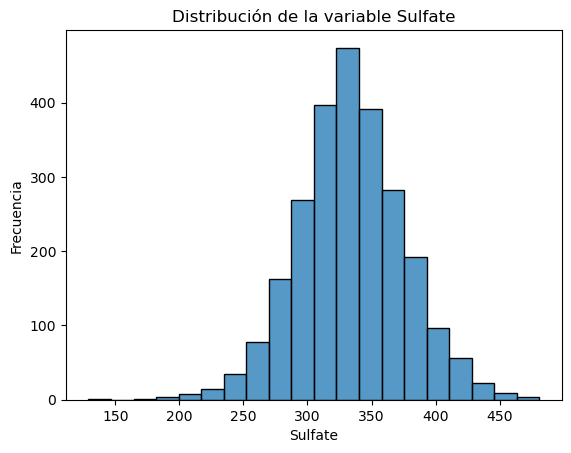

==================== Describe de la variable Conductivity ====================
count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64


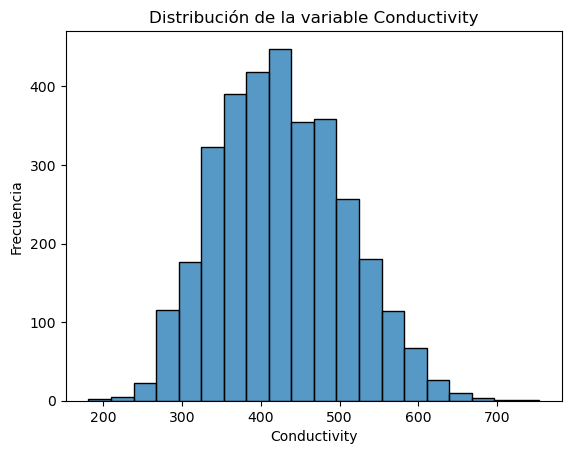

==================== Describe de la variable Organic_carbon ====================
count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: Organic_carbon, dtype: float64


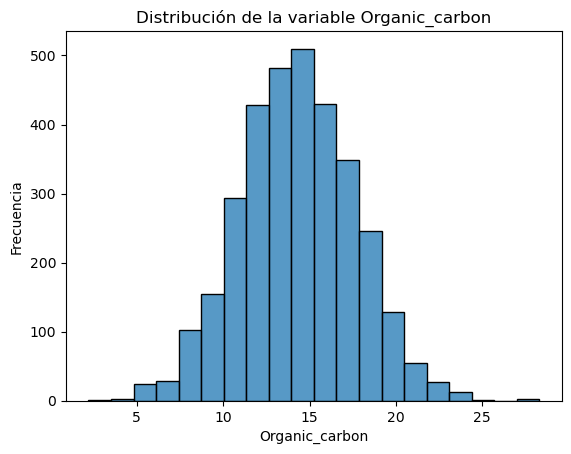

==================== Describe de la variable Trihalomethanes ====================
count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trihalomethanes, dtype: float64


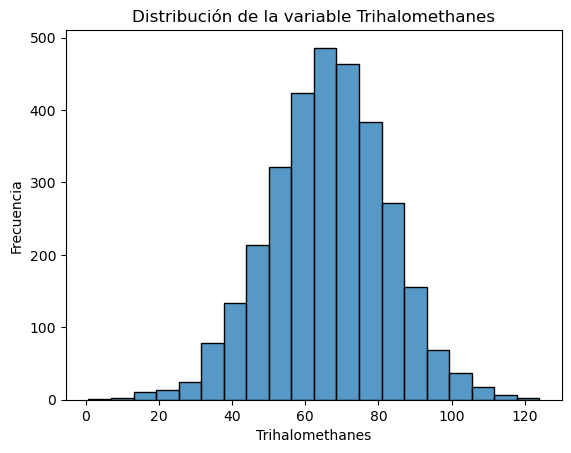

==================== Describe de la variable Turbidity ====================
count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64


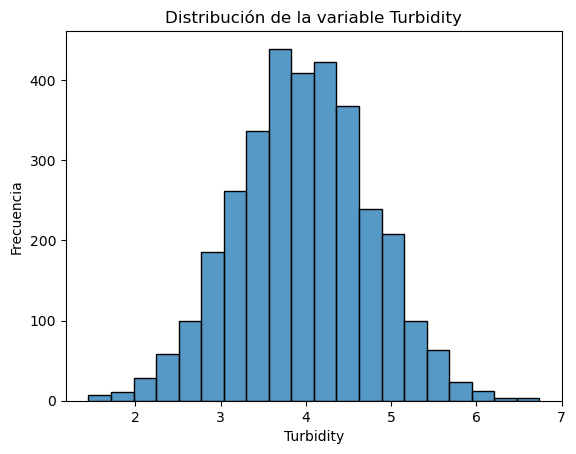

==================== Describe de la variable Potability ====================
count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64


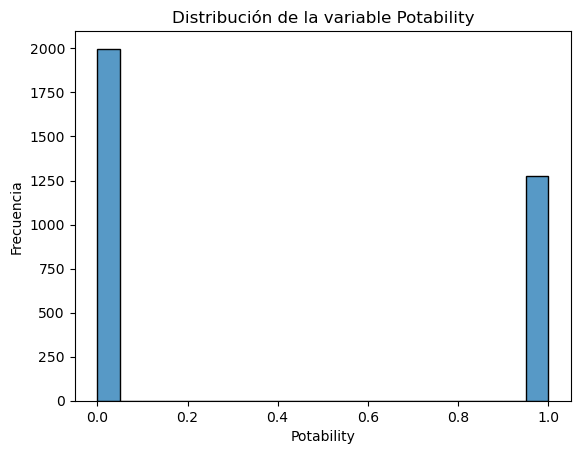

In [6]:
# Se procede a realizar gráficos
# para ver la distribución

for col in df_num_cols:
    print("="*20 + f" Describe de la variable {col} " + "="*20)
    print(df[col].describe())
    plt.figure()
    plt.clf()
    plt.title(f"Distribución de la variable {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frecuencia")
    sns.histplot(data=df, x=col, bins=20)
    plt.show()
   


**Comentarios:**
- La variable target ``Potability`` presenta desbalance.
- Se implementará la imputación de la mediana.
- La mayoría de las variables predictoras siguen una distribución normal y presentan distintas escalas, por lo que es válido aplicar un standarscaler.
- Solo la variable ``Solids`` Presenta un sesgo a la derecha (valores extremos a la derecha).

In [7]:
## importación de librerías para pipeline

# imputacion
from sklearn.impute import SimpleImputer

# escalamiento
from sklearn.preprocessing import StandardScaler

# pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# separación de conjuntos
from sklearn.model_selection import train_test_split

# modelo
from xgboost import XGBClassifier

# métricas
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

### código
target_col = "Potability"
X = df.drop(columns=target_col)
y = df[target_col]

# separación conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True) 

# col_transformer

num_features = [
        "ph",
        "Hardness",
        "Solids",
        "Chloramines",
        "Sulfate",
        "Conductivity",
        "Organic_carbon",
        "Trihalomethanes",
        "Turbidity",
    ]
    
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

col_transformer = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features)
    ]
)

# modelo

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

# pipeline del modelo 
pipeline = Pipeline(steps=[
    ("col_transformer", col_transformer),
    ("clasificador", model)
])

In [ ]:
def optimize_model():
  pass

# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta sección es generar una API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.
- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.
- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenen
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Para la dockerización, asegúrese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.

**R:**
A continuación se presentan las métricas obtenidas al ejecutar los siguientes comandos dentro del entorno Docker:

docker stats --no-stream potabilidad_container

docker top potabilidad_container

docker images potabilidad-api




| *Métrica*              | *Valor observado*                                    | *Comentario*                                                                                                                                                                                                       |
|---------------------------|--------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| *CPU %*                 | 0.17 %                                                 | El uso de CPU es mínimo cuando la API está en reposo, lo que indica que el proceso de Uvicorn/FastAPI consume recursos solo al atender peticiones.                                                                    |
| *Memoria usada*         | 114.5 MiB / 5.68 GiB (≈ 2 %)                           | El contenedor utiliza una cantidad muy baja de memoria en relación con el total disponible. La carga principal proviene del modelo y las librerías de numpy, pandas y xgboost.                                  |
| *Tamaño de la imagen*   | 1.91 GB                                                | El tamaño se considera razonable para una aplicación con dependencias de machine learning. Aunque no es tan liviano como un microservicio básico, sigue siendo mucho menor que una máquina virtual típica (> 10 GB).  |
| *Procesos internos*     | local/bin/uvicorn main:app --host 0.0.0.0 --port 8000 | Solo se ejecuta el proceso principal del servidor, confirmando el aislamiento y simplicidad del contenedor.     

**Comentario:**
El contenedor *potabilidad_container* muestra un uso eficiente de recursos, menos del *1 % de CPU* y alrededor de *115 MiB de memoria* en ejecución.  
El tamaño total de la imagen (*1.9 GB*) se debe a las librerías científicas necesarias para el modelo, pero sigue siendo considerablemente más liviano que una máquina virtual completa.

Esto demuestra que los contenedores Docker son una opción liviana, portable y eficiente para desplegar servicios de machine learning en distintos entornos de la empresa sin overhead significativo.                                                                                                      |


## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?

**R:** Docker es una plataforma que permite desarrollar, enviar y ejecutar aplicaciones en contenedores, luego Docker se diferencia de una máquina virtual porque no virtualiza un sistema operativo completo, sino que utiliza contenedores que comparten el kernel del sistema host. Esto lo hace mucho más liviano, rápido de iniciar y eficiente en recursos, mientras que una máquina virtual requieren una copia completa del sistema operativo , lo que consume más memoria y CPU.

- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?

**R:**  La diferencia entre usar Docker y ejecutar una aplicación directamente en el sistema local es que Docker aísla la aplicación y sus dependencias dentro de un contenedor, evitando conflictos con otros proyectos o versiones del sistema. Ejecutar la aplicación directamente en el sistema local la hace dependiente del entorno del host, lo que puede generar errores de compatibilidad o diferencias entre equipos.

- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?

**R:** Docker asegura la consistencia entre entornos de desarrollo y producción mediante el uso de imágenes que contienen todo el entorno necesario para ejecutar la aplicación, incluyendo el sistema base, librerías y dependencias. De esta forma, la aplicación se comporta igual en cualquier máquina o servidor donde se ejecute esa misma imagen.

- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?

**R:** Los volúmenes en Docker se usan para mantener la persistencia de datos, ya que los contenedores son temporales y sus datos se pierden al eliminarse. Un volumen vincula una carpeta del host con una del contenedor, de modo que la información almacenada se conserva incluso si el contenedor se detiene o se recrea.
- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?

**R:** Un Dockerfile es un archivo que contiene las instrucciones necesarias para construir una imagen Docker, especificando el sistema base, dependencias y comandos de ejecución. El archivo docker-compose.yml sirve para definir y ejecutar múltiples contenedores relacionados entre sí, configurando redes, volúmenes y variables de entorno para levantar todo un entorno con un solo comando.

**Comentario** Acá se muestran imagenes de cómo se fue ejecutando todo, los stats y la api despues de hacer el docker.

![Ejecución del contenedor](imagenes/imagen1.png)
![Ejecución del contenedor](imagenes/imagen2.png)
![Ejecución del contenedor](imagenes/imagen3.png)
![Ejecución del contenedor](imagenes/imagen4.png)
![Ejecución del contenedor](imagenes/imagen5.png)
![Ejecución del contenedor](imagenes/imagen6.png)
![Ejecución del contenedor](imagenes/imagen7.png)
![Ejecución del contenedor](imagenes/imagen8.png)
![Ejecución del contenedor](imagenes/imagen9.png)

# Conclusión

Éxito!
<div align="center">
  <img src="https://i.pinimg.com/originals/55/f5/fd/55f5fdc9455989f8caf7fca7f93bd96a.gif" width="500">
</div>